In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-done-ree/final_dataset_boom .csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score

In [3]:
dataset = pd.read_csv("/kaggle/input/final-done-ree/final_dataset_boom .csv")
dataset.head()

,Platform,Review Content,Helpful votes,Review score,Price,Quality,Service,delivery,Rating
0,daraz,"""I ordered QKZ DM10. Look what they sent... I'...",9,negative,not worth,bad,poor,slow,1
1,daraz,"""It doesn't connect properly to the mobile, an...",9,negative,not worth,bad,poor,slow,1
2,daraz,"""Very bad. 🙂🙂""",7,negative,not worth,bad,poor,slow,1
3,daraz,"""They provided a very bad quality headphone......",11,negative,not worth,bad,poor,slow,1
4,daraz,"""It is lighter than my previous headphones. It...",5,negative,not worth,average,poor,slow,1


In [4]:
dataset = dataset.drop(['Review Content'], axis = 1)
dataset.head()

,Platform,Helpful votes,Review score,Price,Quality,Service,delivery,Rating
0,daraz,9,negative,not worth,bad,poor,slow,1
1,daraz,9,negative,not worth,bad,poor,slow,1
2,daraz,7,negative,not worth,bad,poor,slow,1
3,daraz,11,negative,not worth,bad,poor,slow,1
4,daraz,5,negative,not worth,average,poor,slow,1


In [5]:
print(dataset.apply(lambda col: col.unique()))

Platform                    [daraz, amazon, rokomari, pickaboo]
Helpful votes    [9, 7, 11, 5, 3, 6, 8, 12, 4, 15, 2, 1, 0, 25]
Review score                               [negative, positive]
Price                              [not worth, value for money]
Quality                                    [bad, average, good]
Service                                   [poor, average, good]
delivery                                  [slow, average, fast]
Rating                                          [1, 2, 3, 4, 5]
dtype: object


In [6]:
print(dataset.isnull().sum())

Platform         0
Helpful votes    0
Review score     0
Price            0
Quality          0
Service          0
delivery         0
Rating           0
dtype: int64


In [7]:
dataset = dataset.dropna()
print(dataset.isnull().sum())

Platform         0
Helpful votes    0
Review score     0
Price            0
Quality          0
Service          0
delivery         0
Rating           0
dtype: int64


In [8]:
dataset.shape

(3077, 8)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Platform       3077 non-null   object
 1   Helpful votes  3077 non-null   int64 
 2   Review score   3077 non-null   object
 3   Price          3077 non-null   object
 4   Quality        3077 non-null   object
 5   Service        3077 non-null   object
 6   delivery       3077 non-null   object
 7   Rating         3077 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 192.4+ KB


In [10]:
print(dataset.apply(lambda col: col.unique()))

Platform                    [daraz, amazon, rokomari, pickaboo]
Helpful votes    [9, 7, 11, 5, 3, 6, 8, 12, 4, 15, 2, 1, 0, 25]
Review score                               [negative, positive]
Price                              [not worth, value for money]
Quality                                    [bad, average, good]
Service                                   [poor, average, good]
delivery                                  [slow, average, fast]
Rating                                          [1, 2, 3, 4, 5]
dtype: object


<Axes: xlabel='Rating', ylabel='count'>

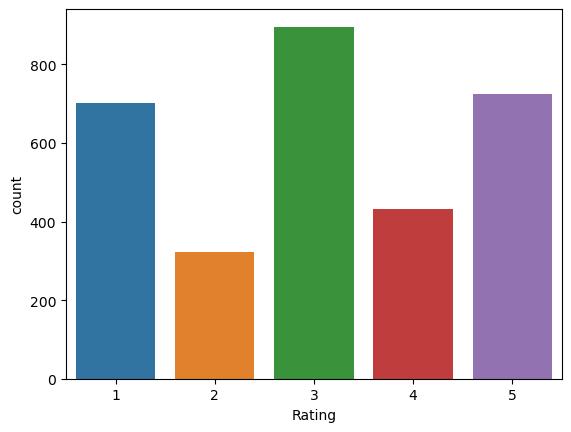

In [11]:
sns.countplot(x ='Rating', data = dataset)

<Axes: xlabel='Platform', ylabel='count'>

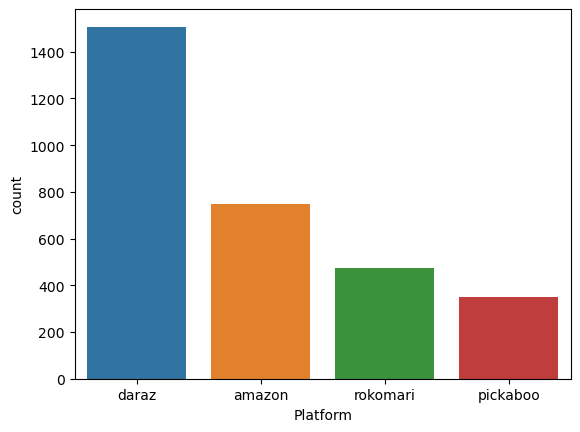

In [12]:
sns.countplot(x ='Platform', data = dataset)

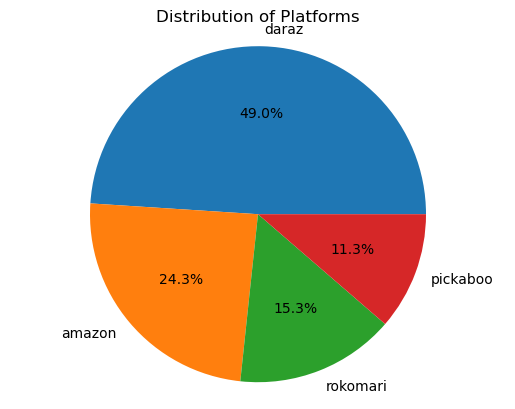

In [13]:


# Calculate the count of each platform
platform_counts = dataset['Platform'].value_counts()

# Plotting the pie chart
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Platforms')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

In [14]:
print(dataset.columns)

Index(['Platform', 'Helpful votes', 'Review score', 'Price', 'Quality',
       'Service', 'delivery', 'Rating'],
      dtype='object')


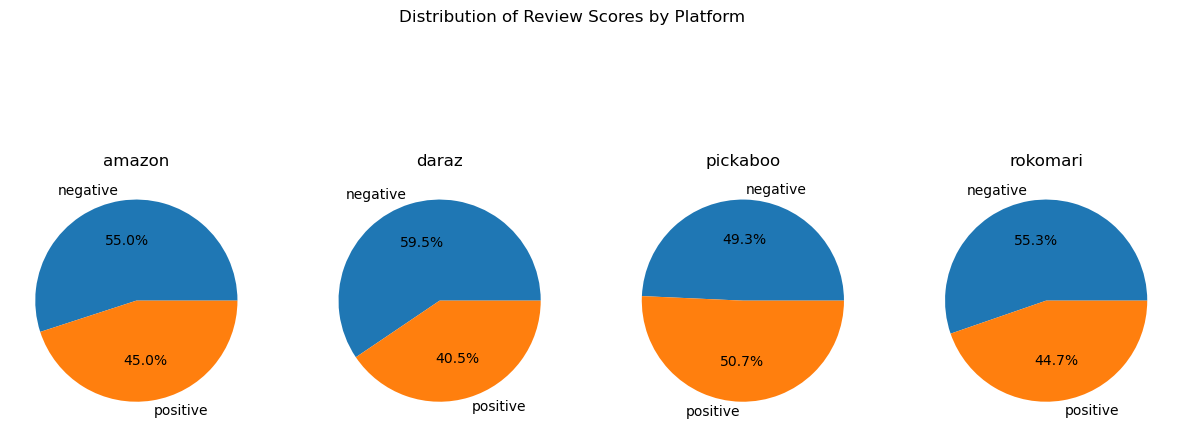

In [15]:


# Drop rows with missing values in 'Review score' column
dataset = dataset.dropna(subset=['Review score'])

# Group by 'Platform' and 'Review score' and get the count
platform_review_counts = dataset.groupby(['Platform', 'Review score']).size().reset_index(name='Count')

# Pivot the dataframe to have the review scores as columns
pivot_df = platform_review_counts.pivot(index='Platform', columns='Review score', values='Count')

# Create a pie chart for each platform
fig, axes = plt.subplots(1, len(pivot_df), figsize=(15, 6))
for i, platform in enumerate(pivot_df.index):
    platform_data = pivot_df.loc[platform]
    platform_data = platform_data.dropna()  # Drop NaN values
    axes[i].pie(platform_data, labels=platform_data.index, autopct='%1.1f%%')
    axes[i].set_title(platform)

# Add a common title for the subplots
fig.suptitle('Distribution of Review Scores by Platform')

plt.show()


/tmp/ipykernel_71/2333131611.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


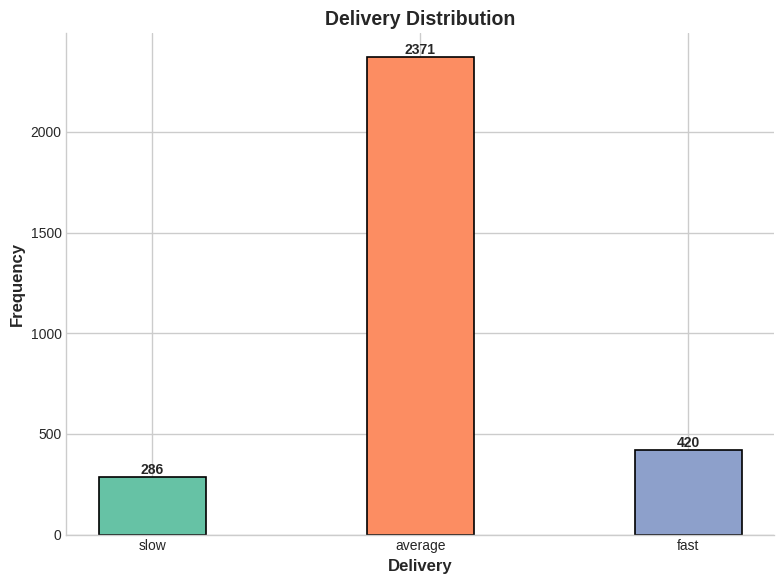

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the seaborn style and font
sns.set(style='ticks')
plt.rcParams['font.family'] = 'DejaVu Sans'

# Data
delivery = ['slow', 'average', 'fast']

# Count the occurrences of each category
delivery_counts = [len(dataset[dataset['delivery'] == d]) for d in delivery]

# Plotting
plt.style.use('seaborn-whitegrid')

# Creating subplots
fig, ax = plt.subplots(figsize=(8, 6))

# X-axis labels
x_labels = delivery

# Y-axis data
y_data = delivery_counts

# Define colors for each bar (using a color palette)
colors = sns.color_palette('Set2')

# Bar width
bar_width = 0.4

# X-axis positions for each bar
x_positions = np.arange(len(x_labels))

# Plotting bars with updated styles
ax.bar(x_positions, y_data, width=bar_width, color=colors, edgecolor='black', linewidth=1.2)

# Set the x-axis ticks and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)

# Set the y-axis label
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Set the x-axis label
ax.set_xlabel('Delivery', fontsize=12, fontweight='bold')

# Set the chart title
ax.set_title('Delivery Distribution', fontsize=14, fontweight='bold')

# Add value labels on top of the bars with updated styles
for i, v in enumerate(y_data):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the spines
sns.despine()

# Customize the tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_71/3059359653.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


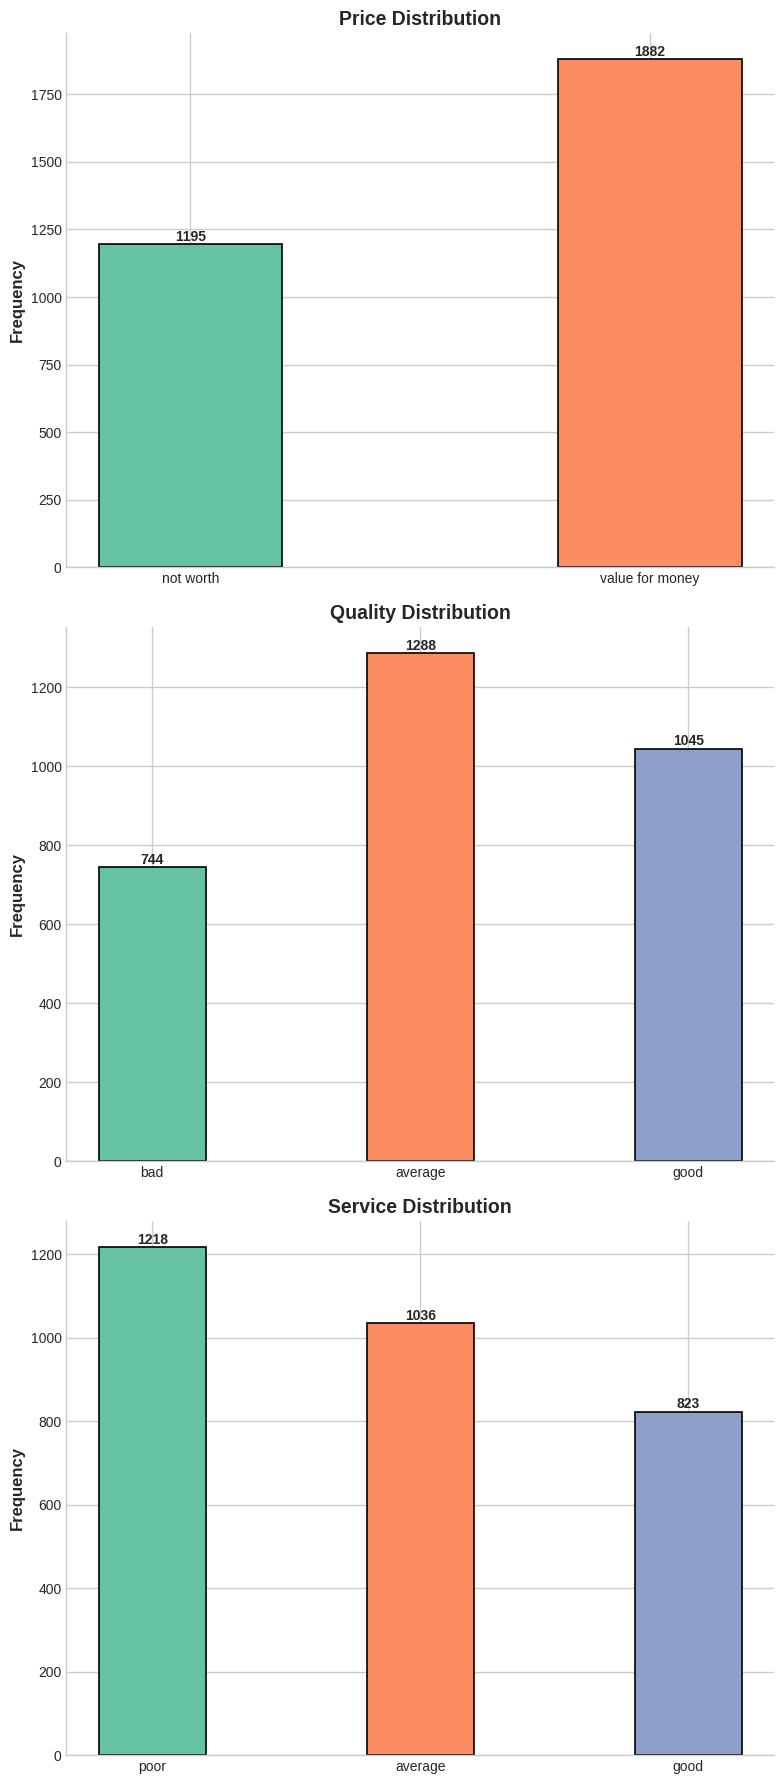

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the seaborn style and font
sns.set(style='ticks')
plt.rcParams['font.family'] = 'DejaVu Sans'

# Data
price = ['not worth', 'value for money']
quality = ['bad', 'average', 'good']
service = ['poor', 'average', 'good']

# Count the occurrences of each category
price_counts = [len(dataset[dataset['Price'] == p]) for p in price]
quality_counts = [len(dataset[dataset['Quality'] == q]) for q in quality]
service_counts = [len(dataset[dataset['Service'] == s]) for s in service]

# Plotting
plt.style.use('seaborn-whitegrid')

# Creating subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 18))

# Define colors for each bar (using a color palette)
colors = sns.color_palette('Set2')

# Bar width
bar_width = 0.4

# X-axis positions for each bar
x_positions = np.arange(len(price))

# Plotting bars for Price
axs[0].bar(x_positions, price_counts, width=bar_width, color=colors, edgecolor='black', linewidth=1.2)
axs[0].set_xticks(x_positions)
axs[0].set_xticklabels(price)
axs[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axs[0].set_title('Price Distribution', fontsize=14, fontweight='bold')

# Add value labels on top of the bars for Price
for i, v in enumerate(price_counts):
    axs[0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plotting bars for Quality
x_positions = np.arange(len(quality))
axs[1].bar(x_positions, quality_counts, width=bar_width, color=colors, edgecolor='black', linewidth=1.2)
axs[1].set_xticks(x_positions)
axs[1].set_xticklabels(quality)
axs[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axs[1].set_title('Quality Distribution', fontsize=14, fontweight='bold')

# Add value labels on top of the bars for Quality
for i, v in enumerate(quality_counts):
    axs[1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plotting bars for Service
x_positions = np.arange(len(service))
axs[2].bar(x_positions, service_counts, width=bar_width, color=colors, edgecolor='black', linewidth=1.2)
axs[2].set_xticks(x_positions)
axs[2].set_xticklabels(service)
axs[2].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axs[2].set_title('Service Distribution', fontsize=14, fontweight='bold')

# Add value labels on top of the bars for Service
for i, v in enumerate(service_counts):
    axs[2].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the spines for all subplots
sns.despine()

# Customize the tick parameters for all subplots
for ax in axs:
    ax.tick_params(labelsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_71/3662779833.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


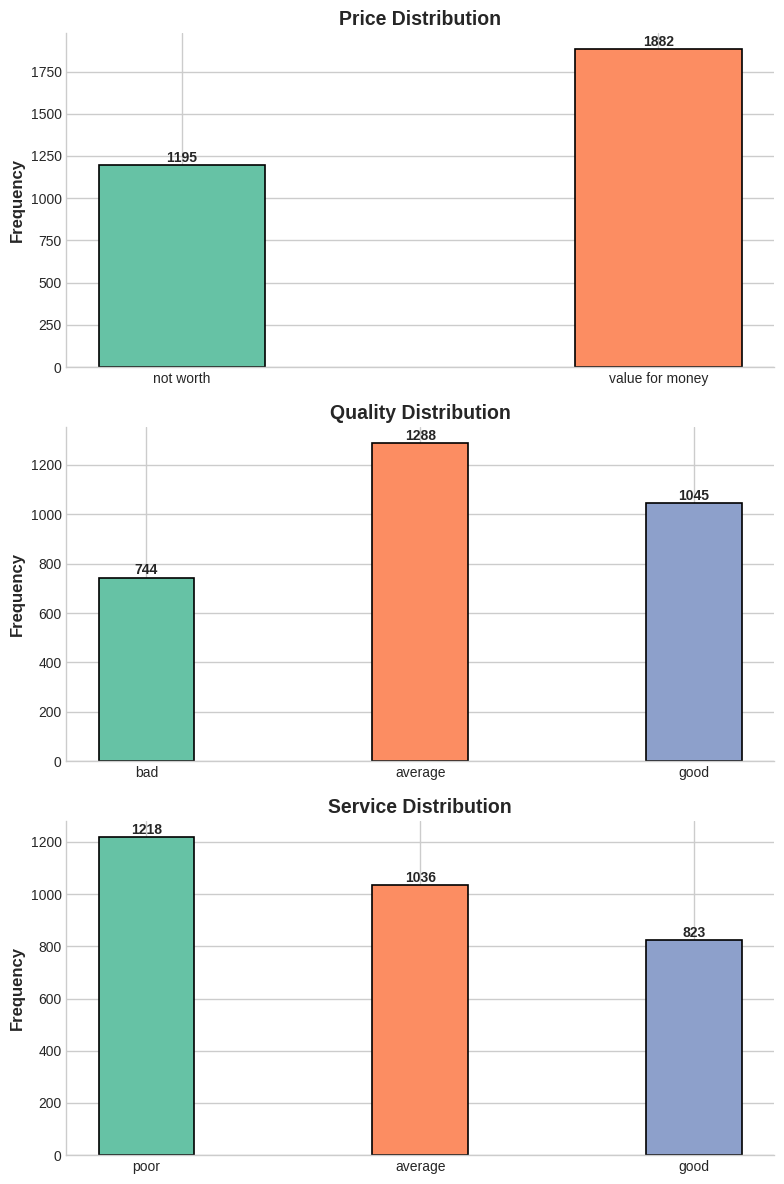

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the seaborn style and font
sns.set(style='ticks')
plt.rcParams['font.family'] = 'DejaVu Sans'

# Data
price = ['not worth', 'value for money']
quality = ['bad', 'average', 'good']
service = ['poor', 'average', 'good']

# Count the occurrences of each category
price_counts = [len(dataset[dataset['Price'] == p]) for p in price]
quality_counts = [len(dataset[dataset['Quality'] == q]) for q in quality]
service_counts = [len(dataset[dataset['Service'] == s]) for s in service]

# Plotting
plt.style.use('seaborn-whitegrid')

# Creating subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Define colors for each bar (using a color palette)
colors = sns.color_palette('Set2')

# Bar width
bar_width = 0.35

# X-axis positions for each bar
x_positions = np.arange(len(price))

# Plotting bars for Price
axs[0].bar(x_positions, price_counts, width=bar_width, color=colors, edgecolor='black', linewidth=1.2)
axs[0].set_xticks(x_positions)
axs[0].set_xticklabels(price)
axs[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axs[0].set_title('Price Distribution', fontsize=14, fontweight='bold')

# Add value labels on top of the bars for Price
for i, v in enumerate(price_counts):
    axs[0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plotting bars for Quality
x_positions = np.arange(len(quality))
axs[1].bar(x_positions, quality_counts, width=bar_width, color=colors, edgecolor='black', linewidth=1.2)
axs[1].set_xticks(x_positions)
axs[1].set_xticklabels(quality)
axs[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axs[1].set_title('Quality Distribution', fontsize=14, fontweight='bold')

# Add value labels on top of the bars for Quality
for i, v in enumerate(quality_counts):
    axs[1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plotting bars for Service
x_positions = np.arange(len(service))
axs[2].bar(x_positions, service_counts, width=bar_width, color=colors, edgecolor='black', linewidth=1.2)
axs[2].set_xticks(x_positions)
axs[2].set_xticklabels(service)
axs[2].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axs[2].set_title('Service Distribution', fontsize=14, fontweight='bold')

# Add value labels on top of the bars for Service
for i, v in enumerate(service_counts):
    axs[2].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the spines for all subplots
sns.despine()

# Customize the tick parameters for all subplots
for ax in axs:
    ax.tick_params(labelsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
dataset['Rating'].mask(dataset['Rating'] == 1, "Not Satisfied", inplace=True)
dataset.head()

,Platform,Helpful votes,Review score,Price,Quality,Service,delivery,Rating
0,daraz,9,negative,not worth,bad,poor,slow,Not Satisfied
1,daraz,9,negative,not worth,bad,poor,slow,Not Satisfied
2,daraz,7,negative,not worth,bad,poor,slow,Not Satisfied
3,daraz,11,negative,not worth,bad,poor,slow,Not Satisfied
4,daraz,5,negative,not worth,average,poor,slow,Not Satisfied


In [20]:
dataset['Rating'].mask(dataset['Rating'] == 2, "Not Satisfied", inplace=True)
dataset['Rating'].mask(dataset['Rating'] == 3, "Moderate Satisfied", inplace=True)
dataset['Rating'].mask(dataset['Rating'] == 4, "Satisfied", inplace=True)
dataset['Rating'].mask(dataset['Rating'] == 5, "Satisfied", inplace=True)
dataset.head()

,Platform,Helpful votes,Review score,Price,Quality,Service,delivery,Rating
0,daraz,9,negative,not worth,bad,poor,slow,Not Satisfied
1,daraz,9,negative,not worth,bad,poor,slow,Not Satisfied
2,daraz,7,negative,not worth,bad,poor,slow,Not Satisfied
3,daraz,11,negative,not worth,bad,poor,slow,Not Satisfied
4,daraz,5,negative,not worth,average,poor,slow,Not Satisfied


In [21]:
dataset.rename(columns = {'Rating':'Satisfaction'}, inplace = True)

<Axes: xlabel='Satisfaction', ylabel='count'>

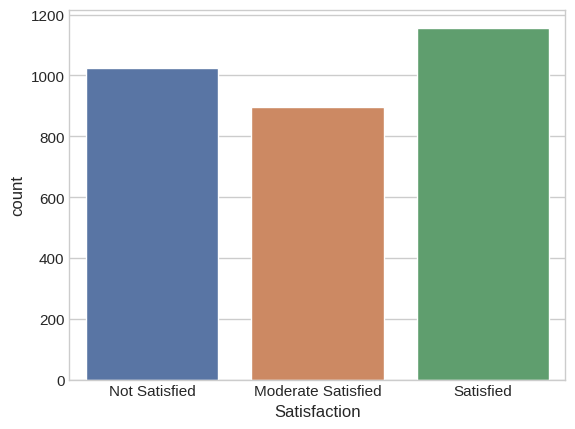

In [22]:
sns.countplot(x ='Satisfaction', data = dataset)

/tmp/ipykernel_71/1451088626.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


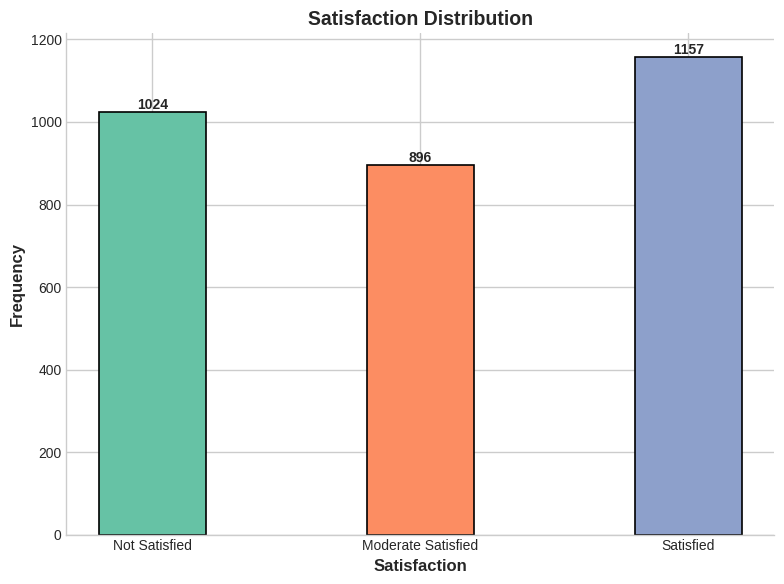

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the seaborn style and font
sns.set(style='ticks')
plt.rcParams['font.family'] = 'DejaVu Sans'

# Data
satisfaction = ['Not Satisfied', 'Moderate Satisfied', 'Satisfied']

# Count the occurrences of each category
satisfaction_counts = [len(dataset[dataset['Satisfaction'] == s]) for s in satisfaction]

# Plotting
plt.style.use('seaborn-whitegrid')

# Creating subplots
fig, ax = plt.subplots(figsize=(8, 6))

# X-axis labels
x_labels = satisfaction

# Y-axis data
y_data = satisfaction_counts

# Define colors for each bar (using a color palette)
colors = sns.color_palette('Set2')

# Bar width
bar_width = 0.4

# X-axis positions for each bar
x_positions = np.arange(len(x_labels))

# Plotting bars with updated styles
ax.bar(x_positions, y_data, width=bar_width, color=colors, edgecolor='black', linewidth=1.2)

# Set the x-axis ticks and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)

# Set the y-axis label
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Set the x-axis label
ax.set_xlabel('Satisfaction', fontsize=12, fontweight='bold')

# Set the chart title
ax.set_title('Satisfaction Distribution', fontsize=14, fontweight='bold')

# Add value labels on top of the bars with updated styles
for i, v in enumerate(y_data):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the spines
sns.despine()

# Customize the tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [24]:
dataset = pd.get_dummies(dataset, columns=['Platform','Review score','Price', 'Quality', 'Service', 'delivery'])

In [25]:
dataset.head()

,Helpful votes,Satisfaction,Platform_amazon,Platform_daraz,Platform_pickaboo,Platform_rokomari,Review score_negative,Review score_positive,Price_not worth,Price_value for money,Quality_average,Quality_bad,Quality_good,Service_average,Service_good,Service_poor,delivery_average,delivery_fast,delivery_slow
0,9,Not Satisfied,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
1,9,Not Satisfied,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
2,7,Not Satisfied,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
3,11,Not Satisfied,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
4,5,Not Satisfied,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1


/tmp/ipykernel_71/3928745667.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot= True)


<Axes: >

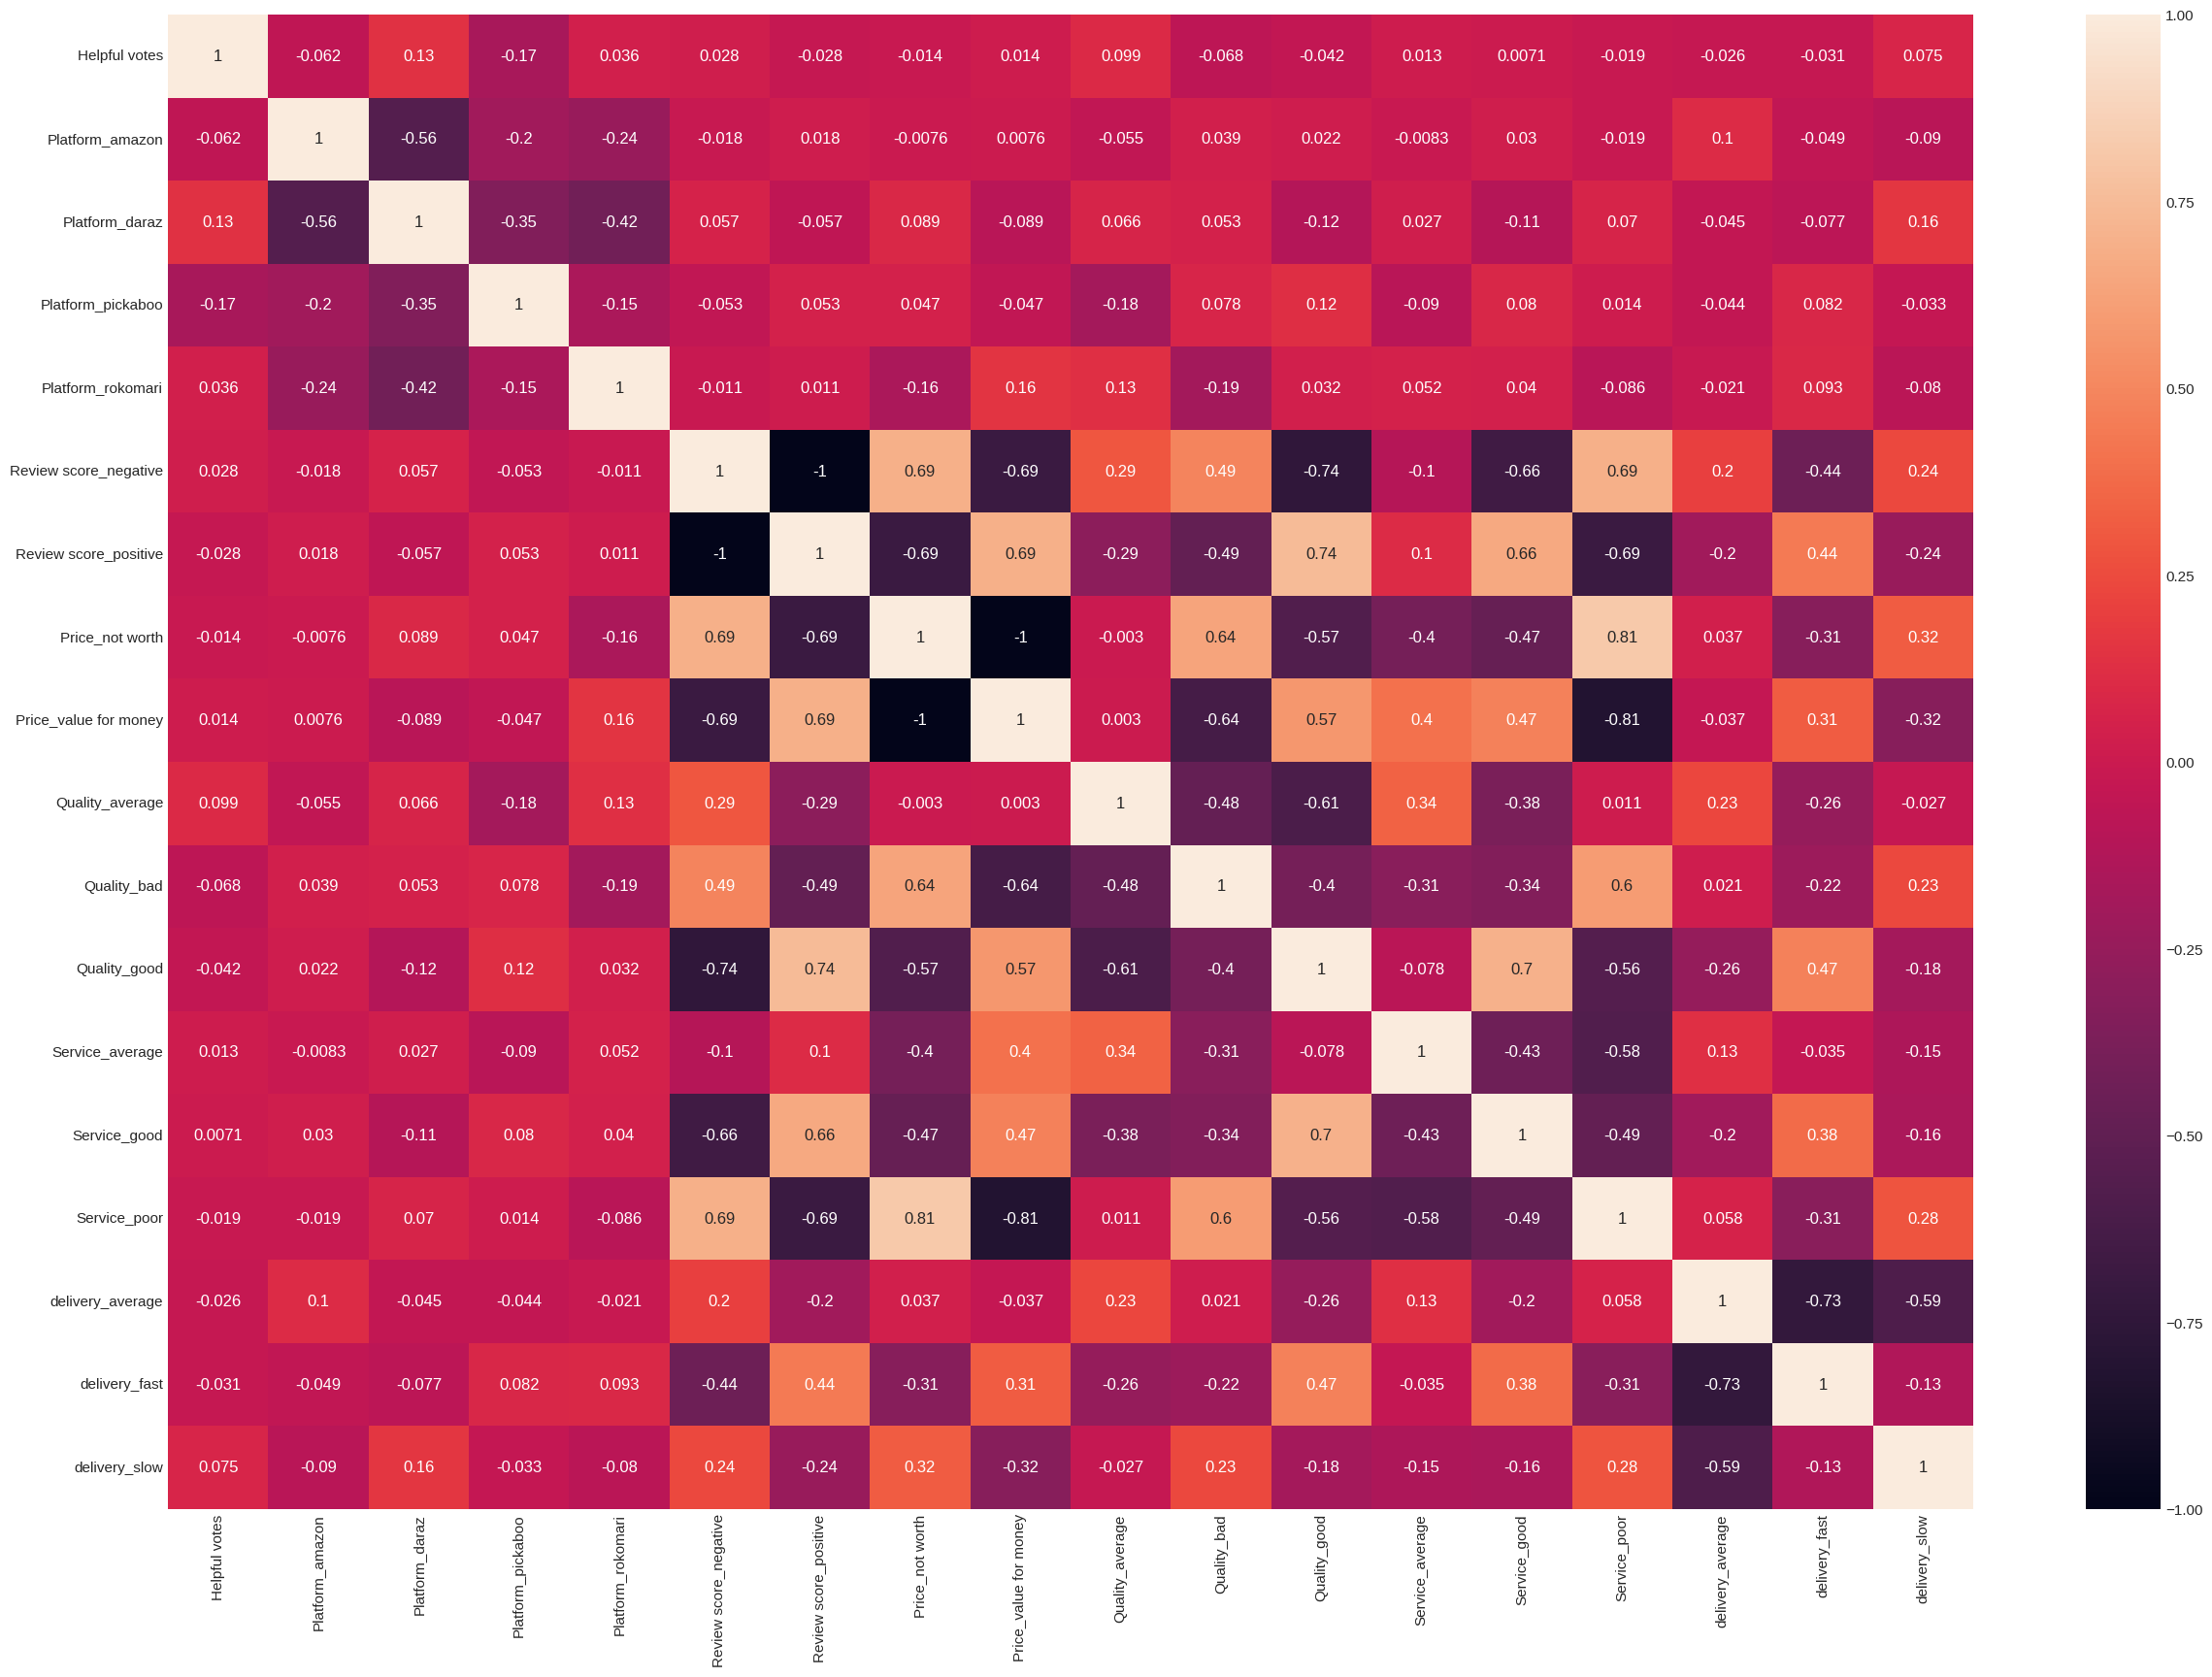

In [26]:
plt.figure(figsize=(30,20)) 
sns.heatmap(dataset.corr(), annot= True)

In [27]:
dataset['Satisfaction']= LabelEncoder().fit_transform(dataset['Satisfaction'])

In [28]:
X = dataset.drop(['Satisfaction'], axis = 1)
y = dataset['Satisfaction']

In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Satisfaction, dtype: int64

In [30]:
X.head()

,Helpful votes,Platform_amazon,Platform_daraz,Platform_pickaboo,Platform_rokomari,Review score_negative,Review score_positive,Price_not worth,Price_value for money,Quality_average,Quality_bad,Quality_good,Service_average,Service_good,Service_poor,delivery_average,delivery_fast,delivery_slow
0,9,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
1,9,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
2,7,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
3,11,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
4,5,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1


In [31]:
from sklearn.preprocessing import scale
X['Helpful votes'] = scale(X['Helpful votes'])
X.head()

,Helpful votes,Platform_amazon,Platform_daraz,Platform_pickaboo,Platform_rokomari,Review score_negative,Review score_positive,Price_not worth,Price_value for money,Quality_average,Quality_bad,Quality_good,Service_average,Service_good,Service_poor,delivery_average,delivery_fast,delivery_slow
0,0.641010,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
1,0.641010,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
2,0.164415,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
3,1.117605,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
4,-0.312180,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20,
                                                    random_state = 53,
                                                    stratify = y)

In [33]:

dataset.head()

,Helpful votes,Satisfaction,Platform_amazon,Platform_daraz,Platform_pickaboo,Platform_rokomari,Review score_negative,Review score_positive,Price_not worth,Price_value for money,Quality_average,Quality_bad,Quality_good,Service_average,Service_good,Service_poor,delivery_average,delivery_fast,delivery_slow
0,9,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
1,9,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
2,7,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
3,11,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
4,5,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Create the classifier objects
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
xgboost = xgb.XGBClassifier()

# Fit the classifiers to the training data
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
ada_boost.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Predict the labels for test data
y_pred_lr = logistic_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_ab = ada_boost.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)
y_pred_xgb = xgboost.predict(X_test)

# Evaluate the models
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

accuracy_ab = accuracy_score(y_test, y_pred_ab)
classification_report_ab = classification_report(y_test, y_pred_ab)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

# Print the results
print('Logistic Regression Accuracy:', accuracy_lr)
print('Logistic Regression Classification Report:\n', classification_report_lr)

print('Decision Tree Accuracy:', accuracy_dt)
print('Decision Tree Classification Report:\n', classification_report_dt)

print('Random Forest Accuracy:', accuracy_rf)
print('Random Forest Classification Report:\n', classification_report_rf)

print('AdaBoost Accuracy:', accuracy_ab)
print('AdaBoost Classification Report:\n', classification_report_ab)

print('Gradient Boosting Accuracy:', accuracy_gb)
print('Gradient Boosting Classification Report:\n', classification_report_gb)

print('SVM Accuracy:', accuracy_svm)
print('SVM Classification Report:\n', classification_report_svm)

print('KNeighbors Accuracy:', accuracy_knn)
print('KNeighbors Classification Report:\n', classification_report_knn)

print('Naive Bayes Accuracy:', accuracy_nb)
print('Naive Bayes Classification Report:\n', classification_report_nb)

print('XGBoost Accuracy:', accuracy_xgb)
print('XGBoost Classification Report:\n', classification_report_xgb)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8392857142857143
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.61      0.70       179
           1       0.88      0.96      0.91       205
           2       0.83      0.91      0.87       232

    accuracy                           0.84       616
   macro avg       0.84      0.83      0.83       616
weighted avg       0.84      0.84      0.83       616

Decision Tree Accuracy: 0.8993506493506493
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       179
           1       0.92      0.94      0.93       205
           2       0.92      0.94      0.93       232

    accuracy                           0.90       616
   macro avg       0.90      0.89      0.89       616
weighted avg       0.90      0.90      0.90       616

Random Forest Accuracy: 0.900974025974026
Random Forest Classifi

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


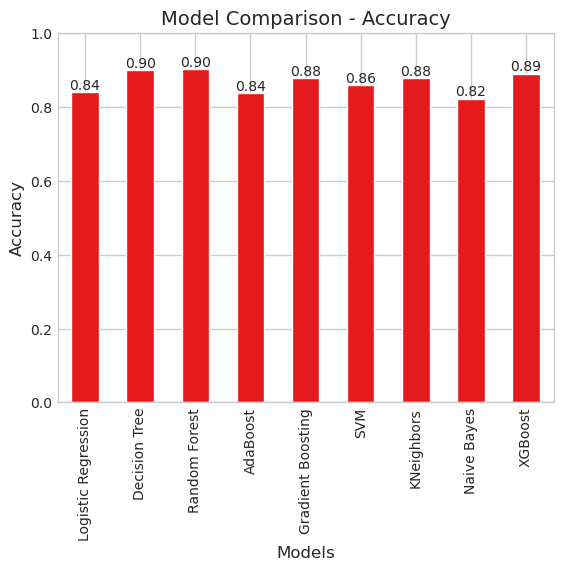

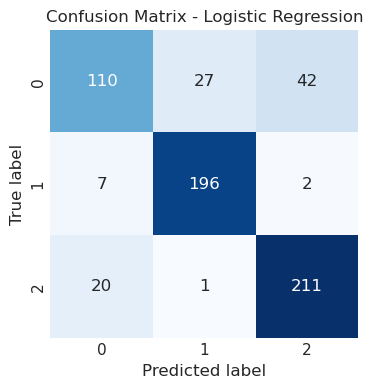

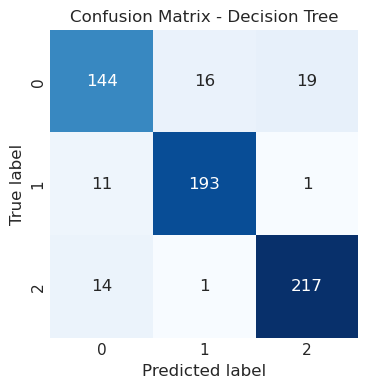

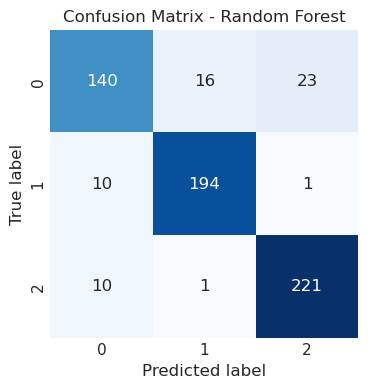

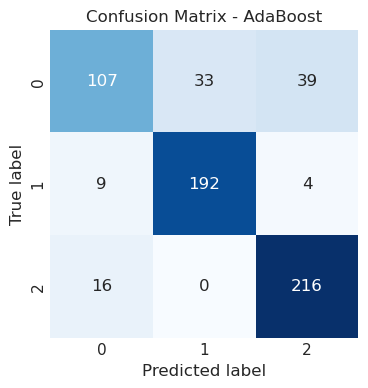

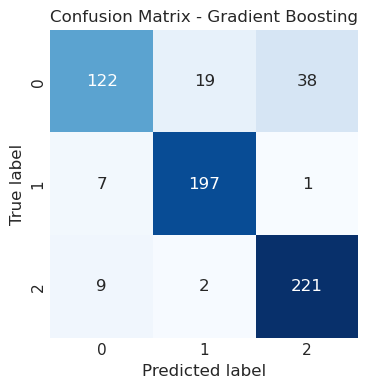

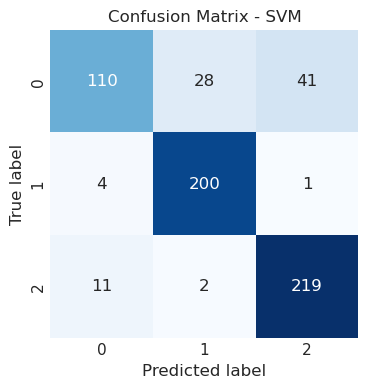

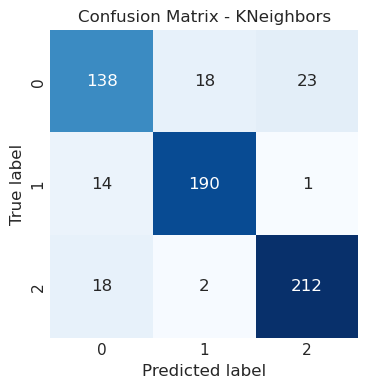

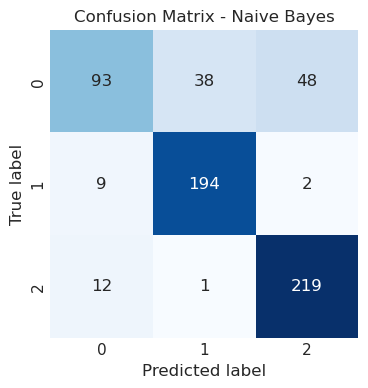

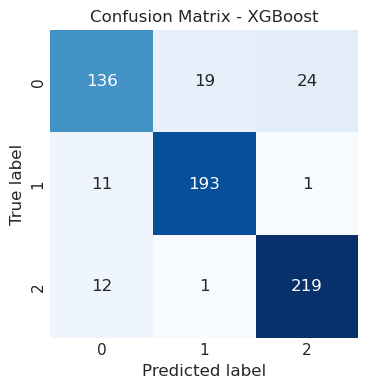

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the classifier objects
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
xgboost = xgb.XGBClassifier()

# Fit the classifiers to the training data
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
ada_boost.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Predict the labels for test data
y_pred_lr = logistic_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_ab = ada_boost.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)
y_pred_xgb = xgboost.predict(X_test)

# Compute the accuracy scores
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Create a dictionary of model scores
model_scores = {
    "Logistic Regression": accuracy_lr,
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf,
    "AdaBoost": accuracy_ab,
    "Gradient Boosting": accuracy_gb,
    "SVM": accuracy_svm,
    "KNeighbors": accuracy_knn,
    "Naive Bayes": accuracy_nb,
    "XGBoost": accuracy_xgb
}

# Create a DataFrame from the model scores
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])

# Set the plot style
sns.set_style("whitegrid")

# Define a color palette
color_palette = sns.color_palette("Set1", len(model_scores))

# Plot the model comparison
ax = model_compare.T.plot.bar(rot=90, legend=False, color=color_palette)

# Customize the plot
plt.title("Model Comparison - Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Show the plot
plt.show()

# Define a function to plot confusion matrix
def plot_conf_mat(y_test, y_preds, algorithm_name):
    cm = confusion_matrix(y_test, y_preds)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, square=True, cmap="Blues")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"Confusion Matrix - {algorithm_name}")
    plt.show()

# Plot confusion matrix for each algorithm
plot_conf_mat(y_test, y_pred_lr, "Logistic Regression")
plot_conf_mat(y_test, y_pred_dt, "Decision Tree")
plot_conf_mat(y_test, y_pred_rf, "Random Forest")
plot_conf_mat(y_test, y_pred_ab, "AdaBoost")
plot_conf_mat(y_test, y_pred_gb, "Gradient Boosting")
plot_conf_mat(y_test, y_pred_svm, "SVM")
plot_conf_mat(y_test, y_pred_knn, "KNeighbors")
plot_conf_mat(y_test, y_pred_nb, "Naive Bayes")
plot_conf_mat(y_test, y_pred_xgb, "XGBoost")


In [36]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5)
lr_cv_accuracy = lr_scores.mean()

# Decision Tree
dt_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
dt_cv_accuracy = dt_scores.mean()

# Random Forest
rf_scores = cross_val_score(random_forest, X_train, y_train, cv=5)
rf_cv_accuracy = rf_scores.mean()

# AdaBoost
ab_scores = cross_val_score(ada_boost, X_train, y_train, cv=5)
ab_cv_accuracy = ab_scores.mean()

# Gradient Boosting
gb_scores = cross_val_score(gradient_boosting, X_train, y_train, cv=5)
gb_cv_accuracy = gb_scores.mean()

# SVM
svm_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm_cv_accuracy = svm_scores.mean()

# KNeighbors
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_cv_accuracy = knn_scores.mean()

# Naive Bayes
nb_scores = cross_val_score(naive_bayes, X_train, y_train, cv=5)
nb_cv_accuracy = nb_scores.mean()

# XGBoost
xgb_scores = cross_val_score(xgboost, X_train, y_train, cv=5)
xgb_cv_accuracy = xgb_scores.mean()
print('Logistic Regression Cross-Validated Accuracy:', lr_cv_accuracy)
print('Decision Tree Cross-Validated Accuracy:', dt_cv_accuracy)
print('Random Forest Cross-Validated Accuracy:', rf_cv_accuracy)
print('AdaBoost Cross-Validated Accuracy:', ab_cv_accuracy)
print('Gradient Boosting Cross-Validated Accuracy:', gb_cv_accuracy)
print('SVM Cross-Validated Accuracy:', svm_cv_accuracy)
print('KNeighbors Cross-Validated Accuracy:', knn_cv_accuracy)
print('Naive Bayes Cross-Validated Accuracy:', nb_cv_accuracy)
print('XGBoost Cross-Validated Accuracy:', xgb_cv_accuracy)



Logistic Regression Cross-Validated Accuracy: 0.8342189020267485
Decision Tree Cross-Validated Accuracy: 0.8679471956991375
Random Forest Cross-Validated Accuracy: 0.8667210870891671
AdaBoost Cross-Validated Accuracy: 0.7992653242962451
Gradient Boosting Cross-Validated Accuracy: 0.867940599284289
SVM Cross-Validated Accuracy: 0.8606350698395422
KNeighbors Cross-Validated Accuracy: 0.8553463942347335
Naive Bayes Cross-Validated Accuracy: 0.8224302841405695
XGBoost Cross-Validated Accuracy: 0.8756625274163493


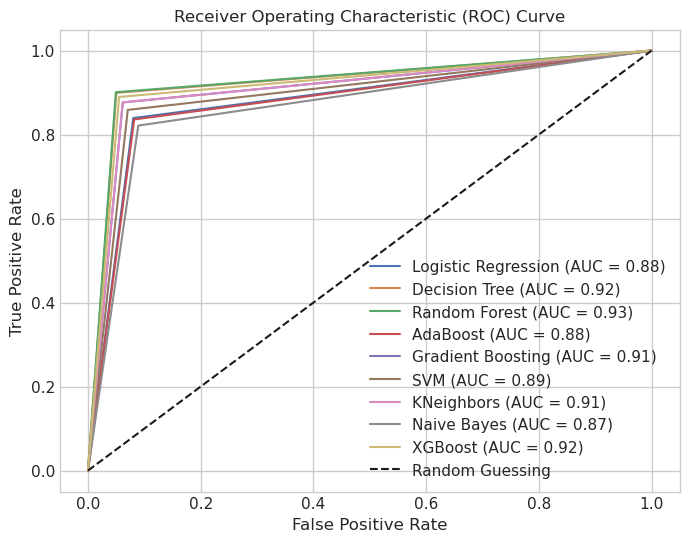

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace [0, 1, 2] with your actual class labels

# Calculate AUC and plot ROC curve for each model
plt.figure(figsize=(8, 6))

for model_name, y_pred in [('Logistic Regression', y_pred_lr), 
                           ('Decision Tree', y_pred_dt), 
                           ('Random Forest', y_pred_rf),
                           ('AdaBoost', y_pred_ab),
                           ('Gradient Boosting', y_pred_gb),
                           ('SVM', y_pred_svm),
                           ('KNeighbors', y_pred_knn),
                           ('Naive Bayes', y_pred_nb),
                           ('XGBoost', y_pred_xgb)]:
    
    y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])  # Replace [0, 1, 2] with your actual class labels
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    auc = roc_auc_score(y_test_bin, y_pred_bin, average='micro')
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot properties
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Create the logistic regression model
logistic_regression = LogisticRegression(max_iter=5000, solver='saga')
# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new logistic regression model with the best hyperparameters
logistic_regression_tuned = LogisticRegression(solver='saga', **best_params)

# Fit the tuned logistic regression model to the scaled training data
logistic_regression_tuned.fit(X_train_scaled, y_train)

# Predict the labels for the scaled test data using the tuned model
y_pred_lr_tuned = logistic_regression_tuned.predict(X_test_scaled)

# Calculate the accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_lr_tuned)
print("Tuned Accuracy:", accuracy_tuned)


Tuned Accuracy: 0.836038961038961


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Create the classifier objects
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
xgboost = xgb.XGBClassifier()

# Fit the classifiers to the training data
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
ada_boost.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Predict the labels for test data
y_pred_lr = logistic_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_ab = ada_boost.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)
y_pred_xgb = xgboost.predict(X_test)

# Evaluate the models
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_ab = accuracy_score(y_test, y_pred_ab)
classification_report_ab = classification_report(y_test, y_pred_ab)
confusion_matrix_ab = confusion_matrix(y_test, y_pred_ab)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the results
print('Logistic Regression Accuracy:', accuracy_lr)
print('Logistic Regression Classification Report:\n', classification_report_lr)

print('Decision Tree Accuracy:', accuracy_dt)
print('Decision Tree Classification Report:\n', classification_report_dt)

print('Random Forest Accuracy:', accuracy_rf)
print('Random Forest Classification Report:\n', classification_report_rf)


print('AdaBoost Accuracy:', accuracy_ab)
print('AdaBoost Classification Report:\n', classification_report_ab)


print('Gradient Boosting Accuracy:', accuracy_gb)
print('Gradient Boosting Classification Report:\n', classification_report_gb)

print('SVM Accuracy:', accuracy_svm)
print('SVM Classification Report:\n', classification_report_svm)


print('KNeighbors Accuracy:', accuracy_knn)
print('KNeighbors Classification Report:\n', classification_report_knn)


print('Naive Bayes Accuracy:', accuracy_nb)
print('Naive Bayes Classification Report:\n', classification_report_nb)


print('XGBoost Accuracy:', accuracy_xgb)
print('XGBoost Classification Report:\n', classification_report_xgb)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8392857142857143
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.61      0.70       179
           1       0.88      0.96      0.91       205
           2       0.83      0.91      0.87       232

    accuracy                           0.84       616
   macro avg       0.84      0.83      0.83       616
weighted avg       0.84      0.84      0.83       616

Decision Tree Accuracy: 0.8993506493506493
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       179
           1       0.92      0.94      0.93       205
           2       0.92      0.94      0.93       232

    accuracy                           0.90       616
   macro avg       0.90      0.89      0.89       616
weighted avg       0.90      0.90      0.90       616

Random Forest Accuracy: 0.900974025974026
Random Forest Classifi

/tmp/ipykernel_71/2867281870.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bars = sns.barplot(x=classifiers, y=accuracies, ci=None)


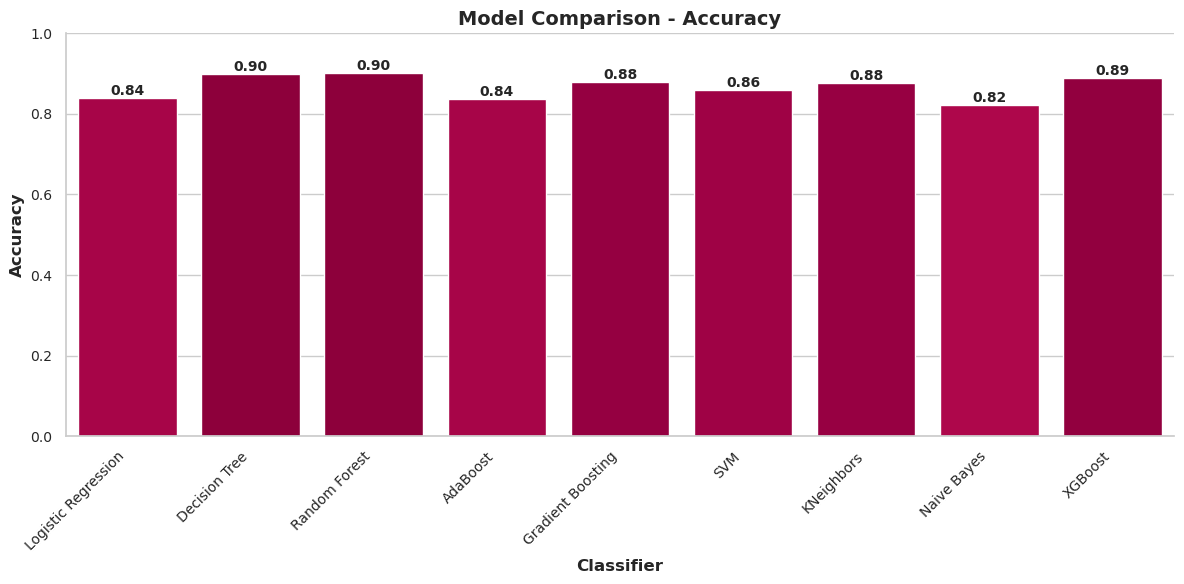

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style and color palette
sns.set(style='whitegrid', palette='husl')

# List of classifiers' names
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'KNeighbors', 'Naive Bayes', 'XGBoost']

# List of classifiers' accuracies
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_ab, accuracy_gb, accuracy_svm, accuracy_knn, accuracy_nb, accuracy_xgb]

# Set a modern font
plt.rcParams['font.family'] = 'Arial'

# Create a bar chart with gradient colors
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=classifiers, y=accuracies, ci=None)

# Add gradient colors to the bars
for bar, acc in zip(bars.patches, accuracies):
    bar.set_facecolor(plt.cm.PuRd(acc))  # Using the 'PuRd' colormap for gradient colors
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.xlabel('Classifier', fontweight='bold', fontsize=12)
plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
plt.title('Model Comparison - Accuracy', fontweight='bold', fontsize=14)
plt.ylim(0, 1)  # Set the y-axis range to better visualize differences
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)

# Remove the top and right spines for a cleaner look
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()


/tmp/ipykernel_71/2863363758.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bars = sns.barplot(x=classifiers, y=accuracies, ci=None)


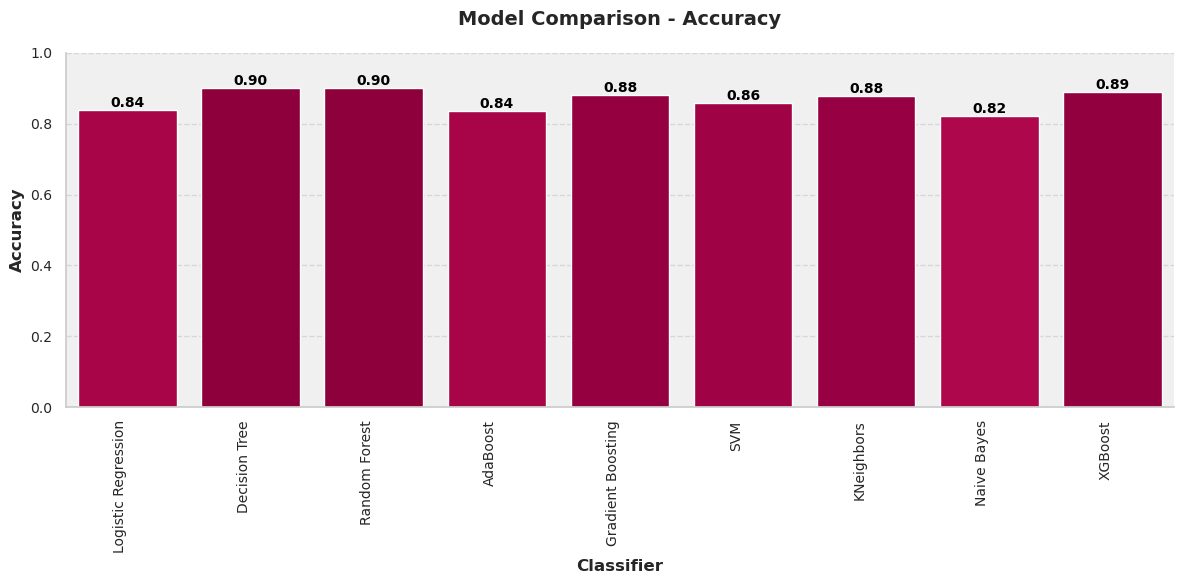

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style and color palette
sns.set(style='whitegrid', palette='husl')

# List of classifiers' names
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'KNeighbors', 'Naive Bayes', 'XGBoost']

# List of classifiers' accuracies
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_ab, accuracy_gb, accuracy_svm, accuracy_knn, accuracy_nb, accuracy_xgb]

# Set a modern font
plt.rcParams['font.family'] = 'Arial'

# Create a bar chart with gradient colors
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=classifiers, y=accuracies, ci=None)

# Add gradient colors to the bars
for bar, acc in zip(bars.patches, accuracies):
    bar.set_facecolor(plt.cm.PuRd(acc))  # Using the 'PuRd' colormap for gradient colors
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

plt.xlabel('Classifier', fontweight='bold', fontsize=12)
plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
plt.title('Model Comparison - Accuracy', fontweight='bold', fontsize=14, pad=20)  # Add padding to the title
plt.ylim(0, 1)  # Set the y-axis range to better visualize differences
plt.xticks(rotation=90, fontsize=10, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)

# Remove the top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Add a grid to the plot for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a background color to the plot
plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

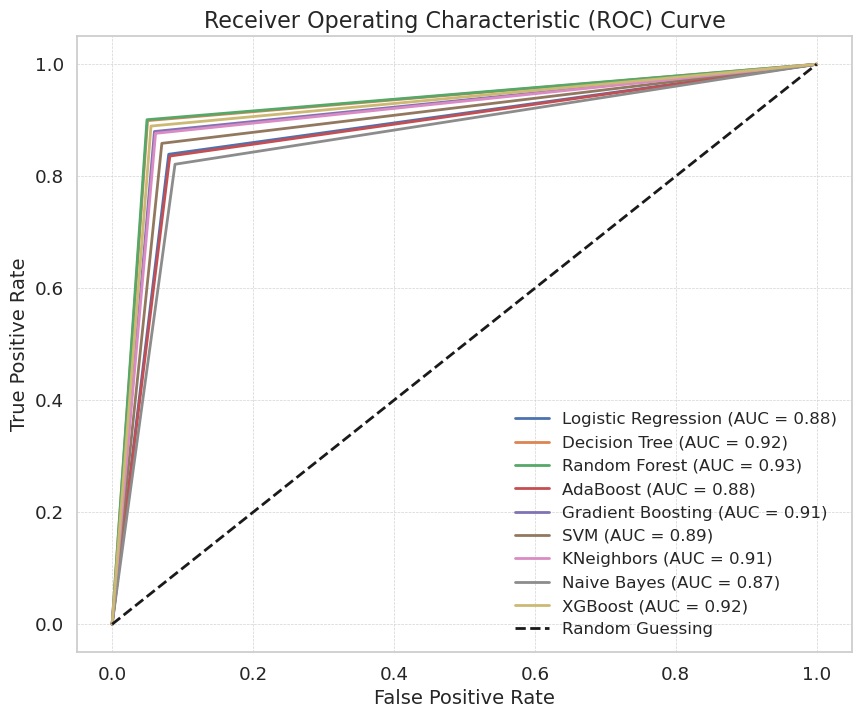

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid', font_scale=1.2)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace [0, 1, 2] with your actual class labels

# Define models and predictions
models = [
    ('Logistic Regression', y_pred_lr),
    ('Decision Tree', y_pred_dt),
    ('Random Forest', y_pred_rf),
    ('AdaBoost', y_pred_ab),
    ('Gradient Boosting', y_pred_gb),
    ('SVM', y_pred_svm),
    ('KNeighbors', y_pred_knn),
    ('Naive Bayes', y_pred_nb),
    ('XGBoost', y_pred_xgb)
]

# Calculate AUC and plot ROC curve for each model
plt.figure(figsize=(10, 8))

for model_name, y_pred in models:
    y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])  # Replace [0, 1, 2] with your actual class labels
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    auc = roc_auc_score(y_test_bin, y_pred_bin, average='micro')
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', linewidth=2)

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', linewidth=2)

# Set plot properties
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add a colorbar for the AUC values
cb = plt.colorbar(pad=0.05)
cb.set_label('Area Under the Curve (AUC)', rotation=270, fontsize=12, labelpad=12)

# Customize tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid', font_scale=1.2)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace [0, 1, 2] with your actual class labels

# Define models and predictions
models = [
    ('Logistic Regression', y_pred_lr),
    ('Decision Tree', y_pred_dt),
    ('Random Forest', y_pred_rf),
    ('AdaBoost', y_pred_ab),
    ('Gradient Boosting', y_pred_gb),
    ('SVM', y_pred_svm),
    ('KNeighbors', y_pred_knn),
    ('Naive Bayes', y_pred_nb),
    ('XGBoost', y_pred_xgb)
]

# Calculate AUC and plot ROC curve for each model
plt.figure(figsize=(10, 8))

for model_name, y_pred in models:
    y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])  # Replace [0, 1, 2] with your actual class labels
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    auc = roc_auc_score(y_test_bin, y_pred_bin, average='micro')
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', linewidth=2)

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', linewidth=2)

# Set plot properties
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Customize tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Print the confusion matrices
print('Logistic Regression Confusion Matrix:\n', confusion_matrix_lr)
print('Decision Tree Confusion Matrix:\n', confusion_matrix_dt)
print('Random Forest Confusion Matrix:\n', confusion_matrix_rf)
print('AdaBoost Confusion Matrix:\n', confusion_matrix_ab)
print('Gradient Boosting Confusion Matrix:\n', confusion_matrix_gb)
print('SVM Confusion Matrix:\n', confusion_matrix_svm)
print('KNeighbors Confusion Matrix:\n', confusion_matrix_knn)
print('Naive Bayes Confusion Matrix:\n', confusion_matrix_nb)
print('XGBoost Confusion Matrix:\n', confusion_matrix_xgb)



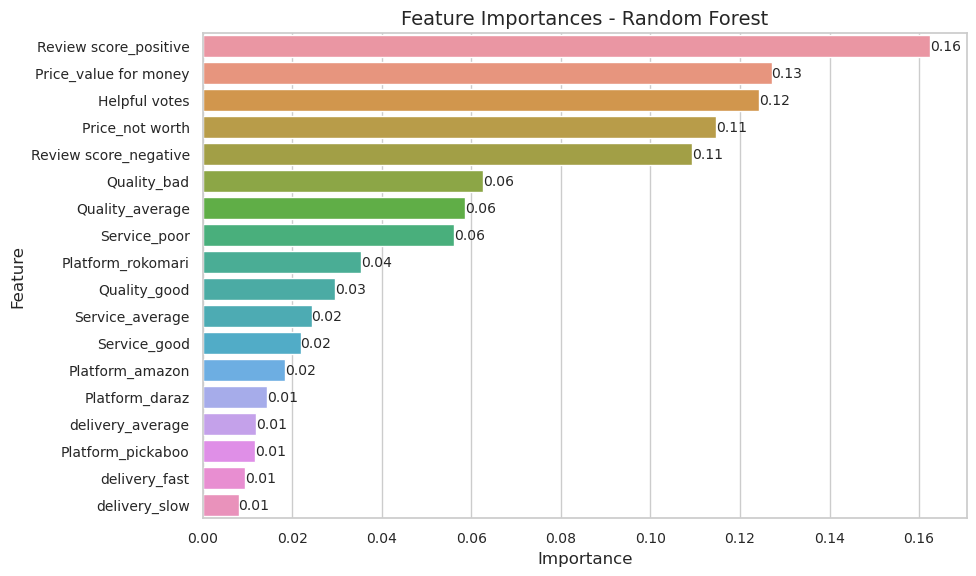

In [43]:
# Get feature importances for Decision Tree and Random Forest
dt_feature_importances = decision_tree.feature_importances_
rf_feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Decision Tree Importance": dt_feature_importances,
    "Random Forest Importance": rf_feature_importances
})

# Sort the DataFrame by Random Forest importance in descending order
feature_importances_df.sort_values(by="Random Forest Importance", ascending=False, inplace=True)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_palette("viridis")

# Plot the feature importances for Random Forest
sns.barplot(x="Random Forest Importance", y="Feature", data=feature_importances_df)

# Customize the plot
plt.title("Feature Importances - Random Forest", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add data labels to the bars
for index, value in enumerate(feature_importances_df["Random Forest Importance"]):
    plt.text(value, index, f"{value:.2f}", ha='left', va='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


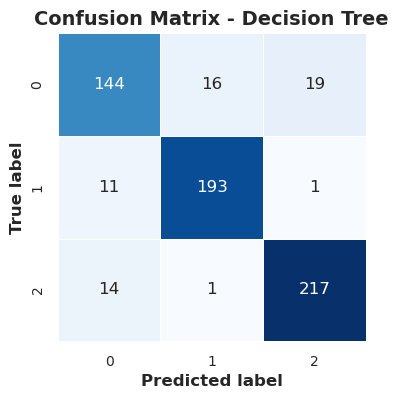

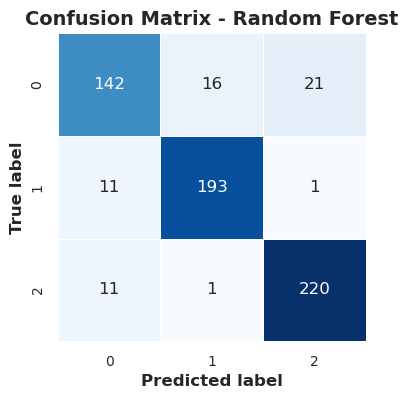

In [44]:
# Define a function to plot confusion matrix
def plot_conf_mat(y_test, y_preds, algorithm_name):
    cm = confusion_matrix(y_test, y_preds)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, square=True, cmap="Blues", linewidths=0.5, linecolor='white', annot_kws={"fontsize": 12})
    plt.xlabel("Predicted label", fontsize=12, fontweight='bold')
    plt.ylabel("True label", fontsize=12, fontweight='bold')
    plt.title(f"Confusion Matrix - {algorithm_name}", fontsize=14, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Plot confusion matrix for Decision Tree
plot_conf_mat(y_test, y_pred_dt, "Decision Tree")

# Plot confusion matrix for Random Forest
plot_conf_mat(y_test, y_pred_rf, "Random Forest")


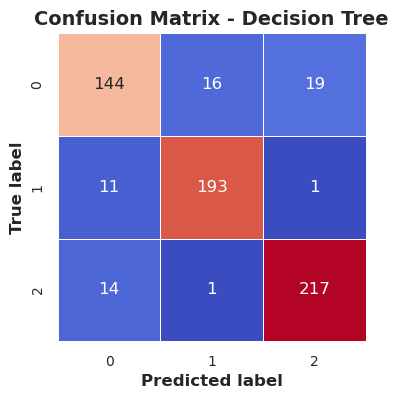

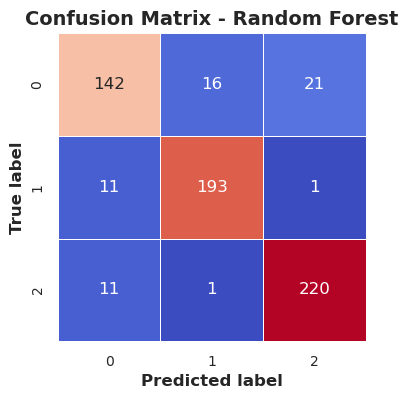

In [46]:
import seaborn as sns

# Define a function to plot confusion matrix
def plot_conf_mat(y_test, y_preds, algorithm_name):
    cm = confusion_matrix(y_test, y_preds)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, square=True, cmap=sns.color_palette("coolwarm", as_cmap=True),
                linewidths=0.5, linecolor='white', annot_kws={"fontsize": 12})
    plt.xlabel("Predicted label", fontsize=12, fontweight='bold')
    plt.ylabel("True label", fontsize=12, fontweight='bold')
    plt.title(f"Confusion Matrix - {algorithm_name}", fontsize=14, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Plot confusion matrix for Decision Tree
plot_conf_mat(y_test, y_pred_dt, "Decision Tree")

# Plot confusion matrix for Random Forest
plot_conf_mat(y_test, y_pred_rf, "Random Forest")


In [48]:
# Print the confusion matrices
print('Logistic Regression Confusion Matrix:\n', confusion_matrix_lr)
print('Decision Tree Confusion Matrix:\n', confusion_matrix_dt)
print('Random Forest Confusion Matrix:\n', confusion_matrix_rf)
print('AdaBoost Confusion Matrix:\n', confusion_matrix_ab)
print('Gradient Boosting Confusion Matrix:\n', confusion_matrix_gb)
print('SVM Confusion Matrix:\n', confusion_matrix_svm)
print('KNeighbors Confusion Matrix:\n', confusion_matrix_knn)
print('Naive Bayes Confusion Matrix:\n', confusion_matrix_nb)
print('XGBoost Confusion Matrix:\n', confusion_matrix_xgb)


Logistic Regression Confusion Matrix:
 [[110  27  42]
 [  7 196   2]
 [ 20   1 211]]
Decision Tree Confusion Matrix:
 [[144  16  19]
 [ 11 193   1]
 [ 14   1 217]]
Random Forest Confusion Matrix:
 [[142  16  21]
 [ 11 193   1]
 [ 11   1 220]]
AdaBoost Confusion Matrix:
 [[107  33  39]
 [  9 192   4]
 [ 16   0 216]]
Gradient Boosting Confusion Matrix:
 [[124  19  36]
 [  7 197   1]
 [  9   2 221]]
SVM Confusion Matrix:
 [[110  28  41]
 [  4 200   1]
 [ 11   2 219]]
KNeighbors Confusion Matrix:
 [[138  18  23]
 [ 14 190   1]
 [ 18   2 212]]
Naive Bayes Confusion Matrix:
 [[ 93  38  48]
 [  9 194   2]
 [ 12   1 219]]
XGBoost Confusion Matrix:
 [[136  19  24]
 [ 11 193   1]
 [ 12   1 219]]
